In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('laptop_data.csv')

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.columns, df.shape

(Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
        'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
       dtype='object'),
 (1303, 12))

In [6]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [8]:
df.isna().any()

Company             False
TypeName            False
Inches              False
ScreenResolution    False
Cpu                 False
Ram                 False
Memory              False
Gpu                 False
OpSys               False
Weight              False
Price               False
dtype: bool

In [9]:
df.duplicated().any()

True

In [10]:
df.drop_duplicates(inplace = True)

<AxesSubplot:>

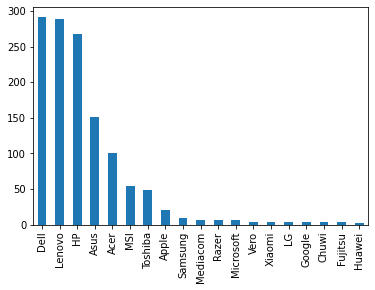

In [11]:
df.Company.value_counts().plot(kind = 'bar')

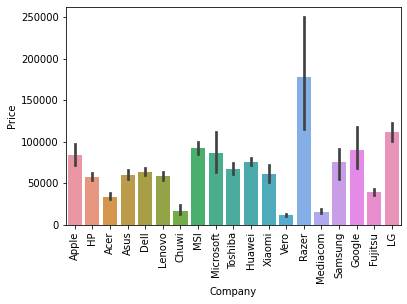

In [12]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

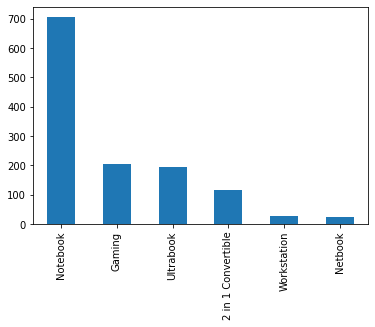

In [13]:
df['TypeName'].value_counts().plot(kind = 'bar')

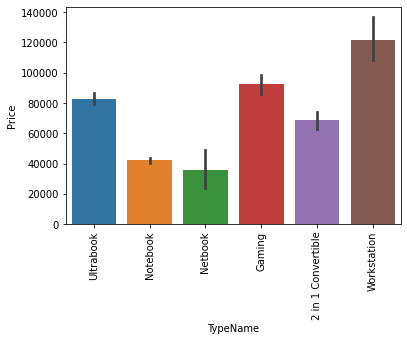

In [14]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Density'>

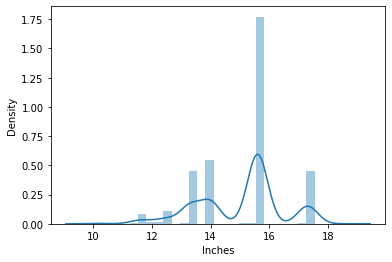

In [15]:
sns.distplot(df.Inches)

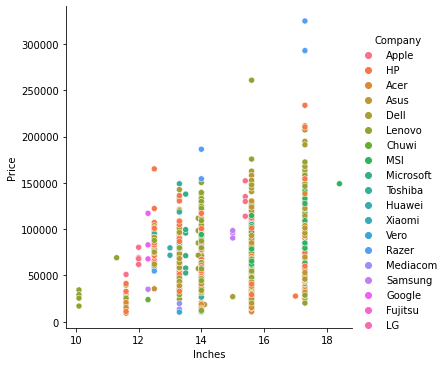

In [16]:
sns.relplot(data = df, x = 'Inches', y = 'Price', hue = 'Company')

In [17]:
df.ScreenResolution.value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

#### **The screen resolution column contains various attributes example screen resolution(1920x1200), screen type(Full HD TN 250nits Anti-glare) 

In [18]:
df['Screen Type'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [19]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screen Type
572,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,AMD A9-Series A9-9420 3GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,1.95kg,34578.7200,0
586,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.78kg,79813.4400,0
734,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.44kg,51148.8000,0
814,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,AMD Radeon R5 M420,Windows 10,2.18kg,42081.0768,0
839,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,128GB HDD,Intel HD Graphics 620,Windows 10,2.3kg,31435.2000,0


<AxesSubplot:>

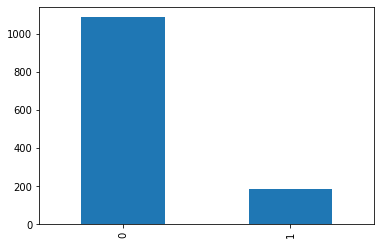

In [20]:
df['Screen Type'].value_counts().plot(kind = 'bar')

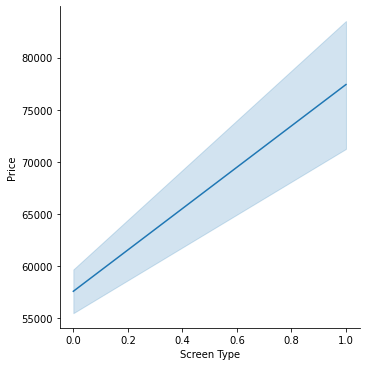

In [21]:
sns.relplot(data = df, x = 'Screen Type', y = 'Price', kind='line', )

In [22]:
df['IPS Panel'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [23]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screen Type,IPS Panel
1029,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63kg,57542.40,0,0
955,Dell,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36kg,168045.12,0,1
62,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.7kg,31914.72,0,1
252,Asus,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows 10,1.68kg,24988.32,0,0
64,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.86kg,36763.20,0,0


<AxesSubplot:>

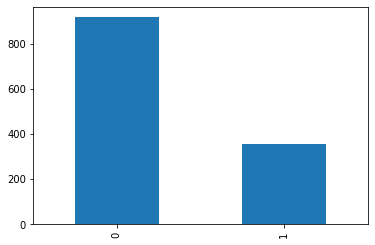

In [24]:
df['IPS Panel'].value_counts().plot(kind = 'bar')

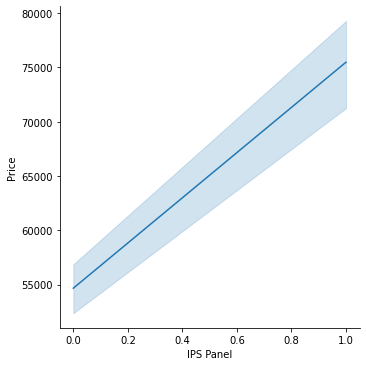

In [25]:
sns.relplot(data = df, x = 'IPS Panel', y = 'Price', kind='line', )

In [26]:
df["XResolution"] = df["ScreenResolution"].apply(lambda x: x.split()[-1].split("x")[0])
df["YResolution"] = df["ScreenResolution"].apply(lambda x: x.split()[-1].split("x")[1])

In [27]:
df['XResolution'] = df['XResolution'].astype('int64')
df['YResolution'] = df['YResolution'].astype('int64')

In [28]:
df.corr()['Price']

Inches         0.066990
Price          1.000000
Screen Type    0.188631
IPS Panel      0.250358
XResolution    0.552074
YResolution    0.548111
Name: Price, dtype: float64

In [29]:
df['PPI'] = (((df['XResolution']**2) + (df['YResolution']**2))**0.5/df['Inches']).astype('float')

In [30]:
df.drop(['ScreenResolution'], axis = 1, inplace = True)

In [31]:
df.drop(['XResolution', 'YResolution'], axis = 1, inplace = True)

In [32]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screen Type,IPS Panel,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005


In [33]:
df.Cpu.value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              132
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Core i7 6920HQ 2.9GHz               1
Intel Core i5 1.3GHz                      1
Intel Pentium Dual Core 4405Y 1.5GHz      1
Intel Core i7 7500U 2.5GHz                1
Intel Core M m3 1.2GHz                    1
Name: Cpu, Length: 118, dtype: int64

<AxesSubplot:>

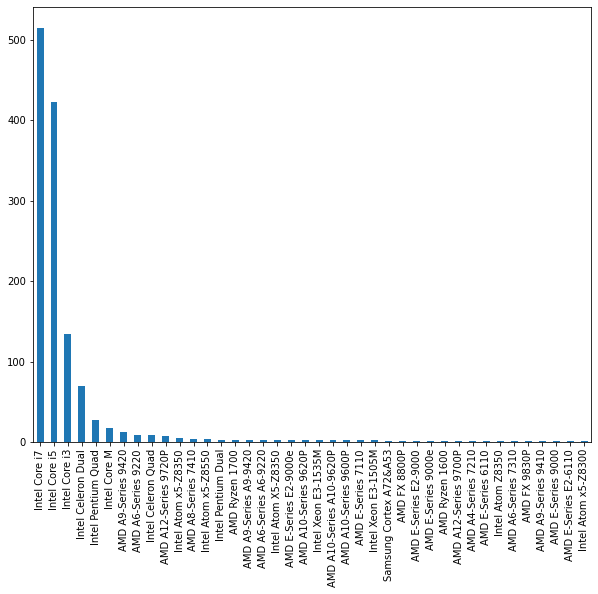

In [34]:
plt.figure(figsize = (10, 8))
df['Cpu'].apply(lambda x:" ".join(x.split()[0:3])).value_counts().plot(kind = 'bar')

<AxesSubplot:>

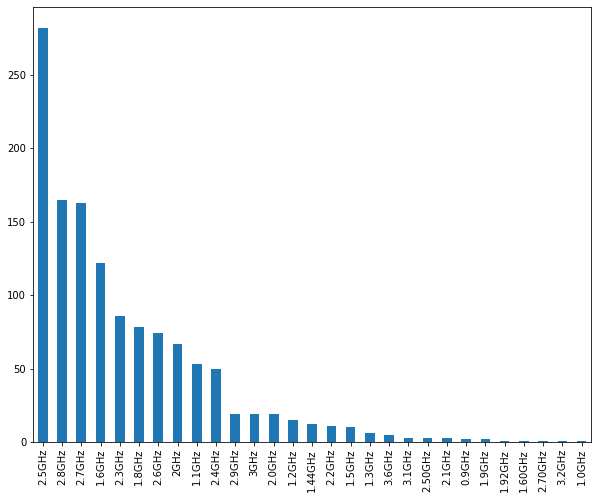

In [35]:
plt.figure(figsize = (10, 8))
df['Cpu'].apply(lambda x:x.split()[-1].split('x')[0]).value_counts().plot(kind = 'bar')

In [36]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [37]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [38]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [39]:
df.sample(10)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screen Type,IPS Panel,PPI,Cpu Name,Cpu brand
1095,Acer,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.4kg,42570.72,0,0,141.211998,Intel Core i5,Intel Core i5
372,Asus,Gaming,17.3,AMD Ryzen 1700 3GHz,16GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.25kg,117162.72,0,1,127.335675,AMD Ryzen 1700,AMD Processor
882,Asus,Notebook,14.1,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.65kg,18541.44,0,0,111.141337,Intel Celeron Dual,Other Intel Processor
623,Fujitsu,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,42570.72,0,0,100.454670,Intel Core i5,Intel Core i5
930,Lenovo,Notebook,15.6,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2.2kg,16463.52,0,0,100.454670,Intel Pentium Quad,Other Intel Processor
988,Dell,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,39906.72,0,0,100.454670,Intel Core i7,Intel Core i7
587,Lenovo,Ultrabook,14.0,Intel Core i7 6600U 2.6GHz,12GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.4kg,89137.44,0,1,157.350512,Intel Core i7,Intel Core i7
492,Asus,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99kg,71928.00,0,0,141.211998,Intel Core i7,Intel Core i7
506,Asus,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD + 1TB HDD,Intel HD Graphics 620,Windows 10,2kg,65214.72,0,0,141.211998,Intel Core i7,Intel Core i7
84,Acer,Notebook,15.6,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5,Windows 10,2.1kg,21045.60,0,0,100.454670,AMD A9-Series 9420,AMD Processor


In [40]:
df.drop(['Cpu', 'Cpu Name'], axis = 1, inplace = True)

In [41]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Screen Type,IPS Panel,PPI,Cpu brand
0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5


In [42]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
#df['Clock speed'] = df['Clock speed'].str.replace('GHz', '')

In [43]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
#df['Clock speed'] = df['Clock speed'].astype('float32')

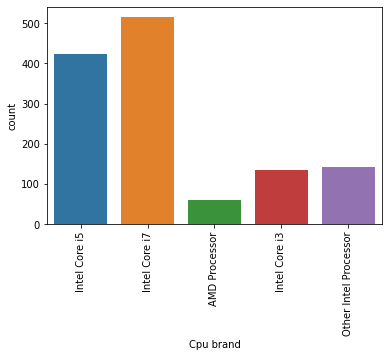

In [44]:
sns.countplot(data = df, x = 'Cpu brand')
plt.xticks(rotation = 90)
plt.show()

In [45]:
df.corr()['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Screen Type    0.188631
IPS Panel      0.250358
PPI            0.469539
Name: Price, dtype: float64

In [46]:
df.drop(['Inches'], axis = 1, inplace = True)

<AxesSubplot:>

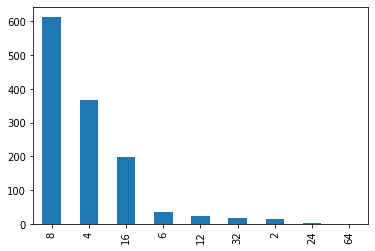

In [47]:
df['Ram'].value_counts().plot(kind = 'bar')

In [48]:
df['Weight'].value_counts() 

2.200    119
2.100     58
2.000     45
2.400     42
2.500     38
        ... 
3.800      1
2.260      1
2.540      1
2.591      1
1.410      1
Name: Weight, Length: 171, dtype: int64

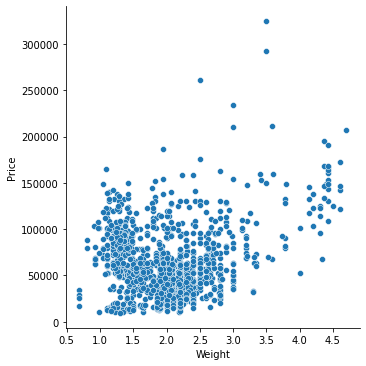

In [49]:
sns.relplot(x = df['Weight'], y = df['Price'])

In [50]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
1TB SSD +  1TB HDD                 2
256GB SSD +  256GB SSD             2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
512GB Flash Storage                2
512GB SSD +  512GB SSD             1
2

In [51]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [52]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Screen Type,IPS Panel,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1150,Lenovo,Notebook,4,1000 HDD,Intel HD Graphics 520,No OS,1.90,18061.9200,0,0,100.454670,Intel Core i3,1000,0,0,0
1072,HP,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 7,1.26,63882.7200,0,0,176.232574,Intel Core i5,0,256,0,0
236,Acer,Notebook,4,1000 HDD,Intel HD Graphics 520,Linux,2.10,20779.2000,0,0,100.454670,Intel Core i3,1000,0,0,0
6,Apple,Ultrabook,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7,0,0,0,256
1180,Lenovo,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 520,Windows 10,1.36,87219.3600,1,1,209.800683,Intel Core i5,0,256,0,0
233,Dell,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.60,45767.5200,0,0,157.350512,Intel Core i5,0,256,0,0
886,Dell,Notebook,4,1000 HDD,AMD Radeon R5 M420X,Linux,2.18,24279.6960,0,0,100.454670,Intel Core i3,1000,0,0,0
175,Dell,Notebook,8,1000 HDD,Intel HD Graphics 620,Windows 10,2.30,24455.5200,0,0,100.454670,Intel Core i3,1000,0,0,0
195,HP,Notebook,8,1000 HDD,Nvidia GeForce 930MX,Windows 10,2.50,48697.9200,0,1,127.335675,Intel Core i5,1000,0,0,0
299,Asus,Ultrabook,16,512 SSD,Nvidia GeForce 940MX,Windows 10,1.63,78215.0400,0,0,141.211998,Intel Core i7,0,512,0,0


In [53]:
df.corr()['Price']

Ram              0.740106
Weight           0.212192
Price            1.000000
Screen Type      0.188631
IPS Panel        0.250358
PPI              0.469539
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64

In [54]:
df.drop(['Hybrid', 'Flash_Storage'], axis = 1, inplace = True)

In [55]:
df['Gpu'].value_counts()

Intel HD Graphics 620       279
Intel HD Graphics 520       181
Intel UHD Graphics 620       68
Nvidia GeForce GTX 1050      66
Nvidia GeForce GTX 1060      48
                           ... 
Intel HD Graphics 530         1
AMD Radeon 540                1
AMD Radeon R9 M385            1
Nvidia GeForce GTX 930MX      1
Nvidia GeForce 920            1
Name: Gpu, Length: 110, dtype: int64

In [56]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [57]:
df['Gpu brand'].value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: Gpu brand, dtype: int64

In [58]:
df = df[df['Gpu brand'] != 'ARM']

In [59]:
df.drop(['Memory', 'Gpu'], axis = 1, inplace = True)

In [60]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [61]:
df['OpSys'] = df['OpSys'].apply(cat_os)

In [62]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Screen Type,IPS Panel,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


<AxesSubplot:>

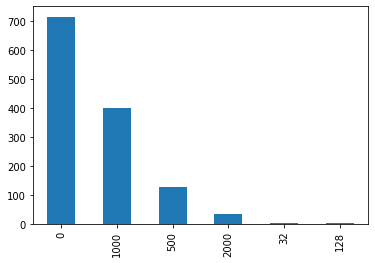

In [63]:
df['HDD'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

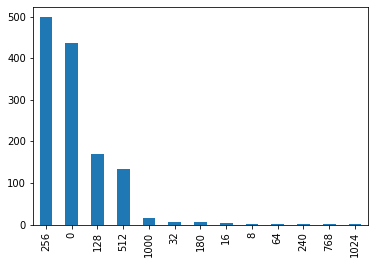

In [64]:
df['SSD'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

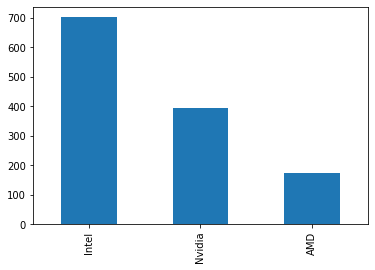

In [65]:
df['Gpu brand'].value_counts().plot(kind = 'bar')

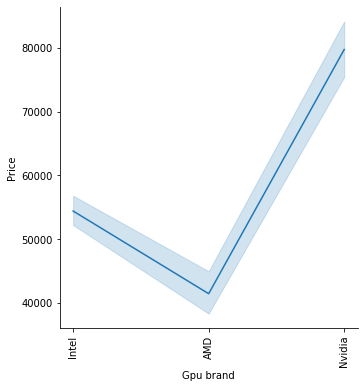

In [66]:
sns.relplot(data = df, x = 'Gpu brand', y = 'Price', kind = 'line')
plt.xticks(rotation = 90)
plt.show()

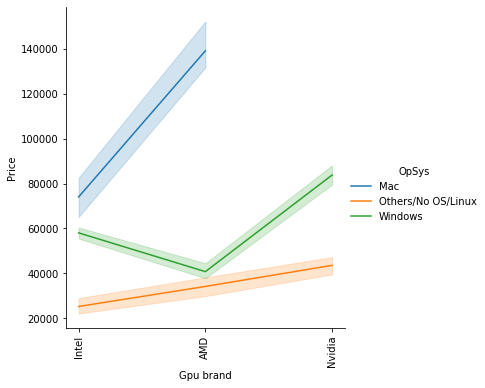

In [67]:
sns.relplot(data = df, x = 'Gpu brand', y = 'Price', kind = 'line', hue = 'OpSys')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

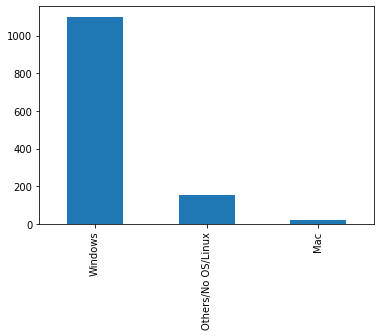

In [68]:
df['OpSys'].value_counts().plot(kind = 'bar')

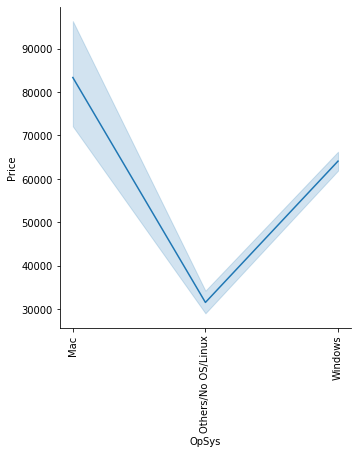

In [69]:
sns.relplot(data = df, x = 'OpSys', y = 'Price', kind = 'line')
plt.xticks(rotation = 90)
plt.show()

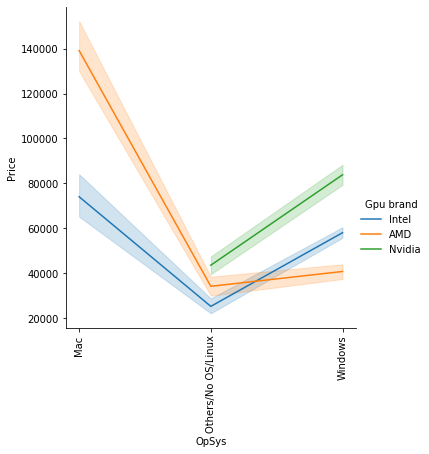

In [70]:
sns.relplot(data = df, x = 'OpSys', y = 'Price', kind = 'line', hue = 'Gpu brand')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Density'>

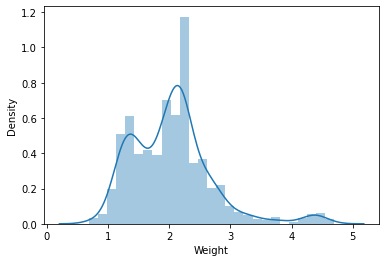

In [71]:
sns.distplot(df['Weight'])

<AxesSubplot:>

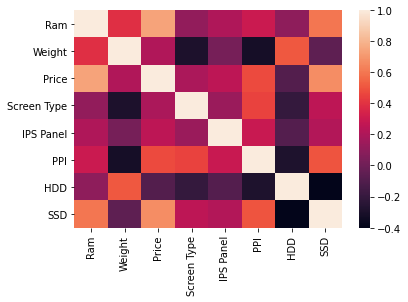

In [72]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Price', ylabel='Density'>

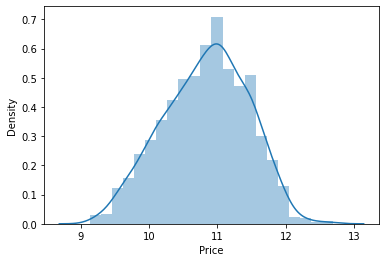

In [73]:
sns.distplot(np.log(df['Price']))

In [74]:
target = np.log(df[['Price']])
variables = df.drop(['Price'], axis = 1)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
xtrain, xtest, ytrain, ytest = train_test_split(variables, target, test_size=0.15, random_state=2)

In [77]:
xtrain.shape, xtest.shape  

((1082, 12), (191, 12))

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [79]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor

# Linear Regression

In [80]:
step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),
                                          [0, 1, 3, 8, 11])], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([('Step1', step1),
                ('Step2', step2)])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('R2 score: {:.4f}'.format(r2_score(ytest, ypred)))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(ytest, ypred))) 

R2 score: 0.7832
Mean Absolute Error: 0.2217


# Ridge Regression

In [81]:
step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),
                                          [0, 1, 3, 8, 11])], remainder='passthrough')

step2 = Ridge(alpha=0.001)

pipe = Pipeline([('Step1', step1),
                ('Step2', step2)])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('R2 score: {:.4f}'.format(r2_score(ytest, ypred)))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(ytest, ypred))) 

R2 score: 0.7832
Mean Absolute Error: 0.2217


# Lasso

In [82]:
step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),
                                          [0, 1, 3, 8, 11])], remainder='passthrough')

step2 = Lasso(alpha = 0.0015)

pipe = Pipeline([('Step1', step1),
                ('Step2', step2)])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('R2 score: {:.4f}'.format(r2_score(ytest, ypred)))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(ytest, ypred))) 

R2 score: 0.7942
Mean Absolute Error: 0.2196


# KNN

In [83]:
step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),
                                          [0, 1, 3, 8, 11])], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=5)

pipe = Pipeline([('Step1', step1),
                ('Step2', step2)])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('R2 score: {:.4f}'.format(r2_score(ytest, ypred)))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(ytest, ypred))) 

R2 score: 0.7605
Mean Absolute Error: 0.2116


# Decision Tree

In [85]:
step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),
                                          [0, 1, 3, 8, 11])], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([('Step1', step1),
                ('Step2', step2)])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('R2 score: {:.4f}'.format(r2_score(ytest, ypred)))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(ytest, ypred))) 

R2 score: 0.8096
Mean Absolute Error: 0.2044


# SVM

In [86]:
step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),
                                          [0, 1, 3, 8, 11])], remainder='passthrough')

step2 = SVR(kernel='rbf', C = 10000, epsilon=0.1)

pipe = Pipeline([('Step1', step1),
                ('Step2', step2)])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('R2 score: {:.4f}'.format(r2_score(ytest, ypred)))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(ytest, ypred))) 

R2 score: 0.8240
Mean Absolute Error: 0.2020


# Random Forest

In [87]:
step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),
                                          [0, 1, 3, 8, 11])], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                             random_state=3, 
                             max_depth=15, 
                             max_samples=0.5,
                             max_features=0.75)
pipe = Pipeline([('Step1', step1),
                ('Step2', step2)])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('R2 score: {:.4f}'.format(r2_score(ytest, ypred)))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(ytest, ypred))) 

R2 score: 0.8554
Mean Absolute Error: 0.1780


# Extra Trees

In [97]:
step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),
                                          [0, 1, 3, 8, 11])], remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=1000,
                             random_state=3, 
                             max_depth=15,  
                             max_features=0.75)

pipe = Pipeline([('Step1', step1),
                ('Step2', step2)])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('R2 score: {:.4f}'.format(r2_score(ytest, ypred)))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(ytest, ypred))) 

R2 score: 0.8371
Mean Absolute Error: 0.1789


# Adaboost

In [89]:
step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),
                                          [0, 1, 3, 8, 11])], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15, learning_rate=0.1)

pipe = Pipeline([('Step1', step1),
                ('Step2', step2)])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('R2 score: {:.4f}'.format(r2_score(ytest, ypred)))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(ytest, ypred))) 

R2 score: 0.7061
Mean Absolute Error: 0.2587


# Gradient Boost

In [90]:
step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),
                                          [0, 1, 3, 8, 11])], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.35)

pipe = Pipeline([('Step1', step1),
                ('Step2', step2)])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('R2 score: {:.4f}'.format(r2_score(ytest, ypred)))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(ytest, ypred))) 

R2 score: 0.8393
Mean Absolute Error: 0.1731


# Bagging

In [91]:
step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),
                                          [0, 1, 3, 8, 11])], remainder='passthrough')

knn = KNeighborsRegressor(n_neighbors=3)
step2 = BaggingRegressor(base_estimator=knn, n_estimators=500, max_features=15, n_jobs=2)

pipe = Pipeline([('Step1', step1),
                ('Step2', step2)])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('R2 score: {:.4f}'.format(r2_score(ytest, ypred)))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(ytest, ypred))) 

R2 score: 0.8614
Mean Absolute Error: 0.1784


# XgBoost

In [92]:
step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),
                                          [0, 1, 3, 8, 11])], remainder='passthrough')

step2 = XGBRegressor(n_estimators=50,max_depth=3,learning_rate=0.5)

pipe = Pipeline([('Step1', step1),
                ('Step2', step2)])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('R2 score: {:.4f}'.format(r2_score(ytest, ypred)))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(ytest, ypred))) 

R2 score: 0.8551
Mean Absolute Error: 0.1764


# Voting Regressor

In [102]:
step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),
                                          [0, 1, 3, 8, 11])], remainder='passthrough')

xgb = XGBRegressor(n_estimators=50,max_depth=3,learning_rate=0.5)
bagg = BaggingRegressor(base_estimator=knn, n_estimators=500, max_features=15, n_jobs=2)
gradnt = GradientBoostingRegressor(n_estimators=500, learning_rate=0.35)
extree = ExtraTreesRegressor(n_estimators=1000, random_state=3,  max_depth=15, max_features=0.75)
randfor = RandomForestRegressor(n_estimators=100, random_state=3,  max_depth=15,  max_samples=0.5, max_features=0.75)
svr = SVR(kernel='rbf', C = 10000, epsilon=0.1)

step2 =  VotingRegressor([('XGB', xgb), ('Bagging', bagg), ('Gradient', gradnt),
                          ('Extratree', extree), ('Randomf', randfor), ('SVM', svr)], weights=[5, 4, 1, 3, 5, 1])

pipe = Pipeline([('Step1', step1),
                ('Step2', step2)])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('R2 score: {:.4f}'.format(r2_score(ytest, ypred)))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(ytest, ypred))) 

R2 score: 0.8719
Mean Absolute Error: 0.1693


# Stacking

In [100]:
step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse=False, drop='first'),
                                          [0, 1, 3, 8, 11])], remainder='passthrough')

estm = [('xgb', XGBRegressor(n_estimators=50,max_depth=3,learning_rate=0.5)),
('bagg', BaggingRegressor(base_estimator=knn, n_estimators=500, max_features=15, n_jobs=2)),
('gradnt', GradientBoostingRegressor(n_estimators=500, learning_rate=0.35)),
('extree', ExtraTreesRegressor(n_estimators=1000, random_state=3,  max_depth=15, max_features=0.75)),
('randfor', RandomForestRegressor(n_estimators=100, random_state=3,  max_depth=15,  max_samples=0.5, max_features=0.75)),
('svr', SVR(kernel='rbf', C = 10000, epsilon=0.1))
       ]

step2 =  StackingRegressor(estimators=estm, final_estimator=Lasso(alpha=0.0015))

pipe = Pipeline([('Step1', step1),
                ('Step2', step2)])

pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

print('R2 score: {:.4f}'.format(r2_score(ytest, ypred)))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(ytest, ypred))) 

R2 score: 0.8707
Mean Absolute Error: 0.1643


In [101]:
import pickle

In [103]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [104]:
xtrain

,Company,TypeName,Ram,OpSys,Weight,Screen Type,IPS Panel,PPI,Cpu brand,HDD,SSD,Gpu brand
716,Dell,Notebook,8,Windows,1.90,0,0,141.211998,Intel Core i5,0,256,Intel
21,Lenovo,Gaming,8,Windows,2.50,0,1,141.211998,Intel Core i5,1000,128,Nvidia
968,Dell,Gaming,32,Windows,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia
273,Lenovo,2 in 1 Convertible,16,Windows,1.36,1,0,209.800683,Intel Core i7,0,512,Intel
1234,Apple,Ultrabook,4,Mac,1.08,0,0,135.094211,Intel Core i5,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,Windows,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia
299,Asus,Ultrabook,16,Windows,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia
493,Acer,Notebook,8,Windows,2.20,0,0,100.454670,AMD Processor,1000,0,AMD
527,Lenovo,Notebook,8,Others/No OS/Linux,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia
